# Raghav Gupta E19CSE258

In [307]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer,LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,classification_report
import seaborn as snb

In [308]:
data = pd.read_csv('./data.csv')

In [309]:
data.head(15)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C


,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,2665,14.4542,NaN,C
1305,3,0,female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,male,26.5000,0,0,2656,7.2250,NaN,C
1307,3,0,male,27.0000,0,0,2670,7.2250,NaN,C


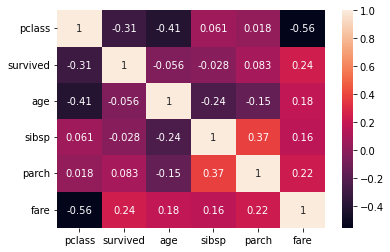

In [310]:
# data.info
snb.heatmap(data.corr(),annot=True)
data.drop('name',axis=1)

In [311]:
data.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [312]:
si = SimpleImputer(strategy='mean')
data['age'] = si.fit_transform(data[['age']])
data['fare'] = si.fit_transform(data[['fare']])

In [313]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [314]:
data.dropna(subset=['cabin', 'embarked'], inplace=True)

In [315]:
data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

In [316]:
data.describe()

,pclass,survived,age,sibsp,parch,fare
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,1.187713,0.651877,36.280487,0.484642,0.447099,81.942166
std,0.512434,0.477190,15.060883,0.633486,0.768449,79.288914
min,1.000000,0.000000,0.916700,0.000000,0.000000,0.000000
25%,1.000000,0.000000,27.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,35.000000,0.000000,0.000000,56.929200
75%,1.000000,1.000000,48.000000,1.000000,1.000000,93.500000
max,3.000000,1.000000,80.000000,3.000000,4.000000,512.329200


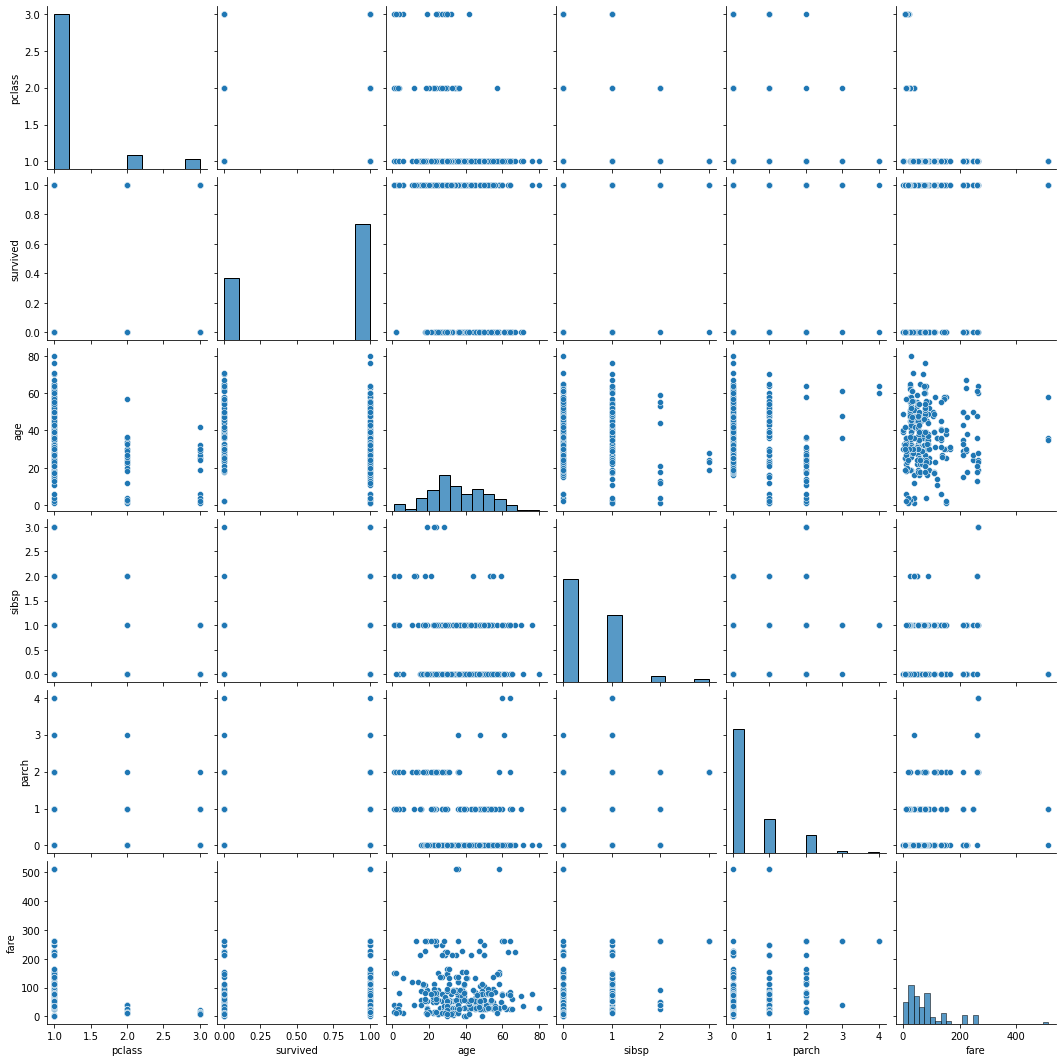

In [317]:
snb.pairplot(data)

In [318]:
data.drop('name',axis=1)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,female,29.000000,0,0,24160,211.3375,B5,S
1,1,1,male,0.916700,1,2,113781,151.5500,C22 C26,S
2,1,0,female,2.000000,1,2,113781,151.5500,C22 C26,S
3,1,0,male,30.000000,1,2,113781,151.5500,C22 C26,S
4,1,0,female,25.000000,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...
1189,3,1,female,4.000000,1,1,PP 9549,16.7000,G6,S
1217,3,0,male,19.000000,0,0,348124,7.6500,F G73,S
1230,3,0,female,2.000000,0,1,347054,10.4625,G6,S
1231,3,0,female,29.000000,1,1,347054,10.4625,G6,S


In [319]:
le = LabelEncoder()
data['embarked'] = le.fit_transform(data['embarked'])
data['sex'] = le.fit_transform(data['sex'])

In [320]:
def MultiEncoding(colname , df):
    un = []
    unique = []
    for i in df[colname]:
        temp = i.split(' ')
        for j in range(len(temp)):
            temp[j] = temp[j].replace("'",'')
            # temp[j] += '_'+colname
            unique.append(temp[j])
        un.append(temp)
    unique = set(unique)
    df[colname] = np.array(un)
    mlb = MultiLabelBinarizer(classes=list(unique))
    temp = mlb.fit_transform(df[[colname][0]])
    print(list(mlb.classes_))
    print(temp[:5])
    df[mlb.classes_] = temp

In [321]:
MultiEncoding('cabin',data)

data.drop('cabin',axis=1)

['B57', 'C52', 'E39', 'C110', 'E34', 'G63', 'E36', 'B98', 'C31', 'E8', 'F38', 'B66', 'D30', 'A34', 'E40', 'C103', 'C64', 'D36', 'E49', 'C32', 'D33', 'A24', 'C82', 'C85', 'C95', 'D45', 'B22', 'C86', 'B41', 'C104', 'C54', 'D35', 'A14', 'C125', 'B101', 'B50', 'B52', 'C90', 'C2', 'C87', 'E17', 'A36', 'B82', 'E67', 'C45', 'D22', 'C50', 'B53', 'F4', 'E68', 'B19', 'F2', 'C55', 'C65', 'C130', 'B11', 'B63', 'A20', 'B61', 'D37', 'A18', 'D47', 'C118', 'B84', 'E77', 'B78', 'A32', 'D20', 'E38', 'C93', 'B49', 'B71', 'C83', 'E44', 'B73', 'B69', 'B94', 'C7', 'D6', 'C51', 'E57', 'B51', 'B102', 'E33', 'B54', 'B30', 'C128', 'G6', 'D40', 'B10', 'C57', 'B26', 'E24', 'C23', 'D26', 'A19', 'B60', 'C91', 'C123', 'C132', 'A26', 'C106', 'C97', 'A9', 'B38', 'D19', 'D9', 'C78', 'A11', 'A5', 'C148', 'C80', 'C30', 'C25', 'B24', 'G73', 'E69', 'C126', 'D46', 'D43', 'D50', 'C27', 'B58', 'D7', 'B18', 'C99', 'E60', 'D17', 'B80', 'B96', 'B55', 'D10', 'D56', 'E46', 'C92', 'C47', 'E10', 'C124', 'D38', 'B42', 'A23', 'A7', 'C

/tmp/ipykernel_309/3702132368.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df[colname] = np.array(un)
/home/lord/.local/lib/python3.8/site-packages/pandas/core/frame.py:3673: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,...,D15,B77,E25,A10,F33,B86,B35,E63,D21,D28
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.000000,0,0,24160,211.3375,2,...,0,0,0,0,0,0,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",1,0.916700,1,2,113781,151.5500,2,...,0,0,0,0,0,0,0,0,0,0
2,1,0,"Allison, Miss. Helen Loraine",0,2.000000,1,2,113781,151.5500,2,...,0,0,0,0,0,0,0,0,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1,2,113781,151.5500,2,...,0,0,0,0,0,0,0,0,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1,2,113781,151.5500,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,3,1,"Sandstrom, Miss. Marguerite Rut",0,4.000000,1,1,PP 9549,16.7000,2,...,0,0,0,0,0,0,0,0,0,0
1217,3,0,"Soholt, Mr. Peter Andreas Lauritz Andersen",1,19.000000,0,0,348124,7.6500,2,...,0,0,0,0,0,0,0,0,0,0
1230,3,0,"Strom, Miss. Telma Matilda",0,2.000000,0,1,347054,10.4625,2,...,0,0,0,0,0,0,0,0,0,0
1231,3,0,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",0,29.000000,1,1,347054,10.4625,2,...,0,0,0,0,0,0,0,0,0,0


In [322]:
data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,D15,B77,E25,A10,F33,B86,B35,E63,D21,D28
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,[B5],...,0,0,0,0,0,0,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,"[C22, C26]",...,0,0,0,0,0,0,0,0,0,0
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,"[C22, C26]",...,0,0,0,0,0,0,0,0,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,"[C22, C26]",...,0,0,0,0,0,0,0,0,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,"[C22, C26]",...,0,0,0,0,0,0,0,0,0,0


In [323]:
data.drop(data[['ticket']] , axis=1)

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,...,D15,B77,E25,A10,F33,B86,B35,E63,D21,D28
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.000000,0,0,211.3375,[B5],2,...,0,0,0,0,0,0,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",1,0.916700,1,2,151.5500,"[C22, C26]",2,...,0,0,0,0,0,0,0,0,0,0
2,1,0,"Allison, Miss. Helen Loraine",0,2.000000,1,2,151.5500,"[C22, C26]",2,...,0,0,0,0,0,0,0,0,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1,2,151.5500,"[C22, C26]",2,...,0,0,0,0,0,0,0,0,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1,2,151.5500,"[C22, C26]",2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,3,1,"Sandstrom, Miss. Marguerite Rut",0,4.000000,1,1,16.7000,[G6],2,...,0,0,0,0,0,0,0,0,0,0
1217,3,0,"Soholt, Mr. Peter Andreas Lauritz Andersen",1,19.000000,0,0,7.6500,"[F, G73]",2,...,0,0,0,0,0,0,0,0,0,0
1230,3,0,"Strom, Miss. Telma Matilda",0,2.000000,0,1,10.4625,[G6],2,...,0,0,0,0,0,0,0,0,0,0
1231,3,0,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",0,29.000000,1,1,10.4625,[G6],2,...,0,0,0,0,0,0,0,0,0,0


In [324]:
scale = StandardScaler()
data['age'] = scale.fit_transform(data[['age']])
data.drop('parch',axis=1)
data.drop('sibsp',axis=1)

,pclass,survived,name,sex,age,parch,ticket,fare,cabin,embarked,...,D15,B77,E25,A10,F33,B86,B35,E63,D21,D28
0,1,1,"Allen, Miss. Elisabeth Walton",0,-0.484231,0,24160,211.3375,[B5],2,...,0,0,0,0,0,0,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",1,-2.352073,2,113781,151.5500,"[C22, C26]",2,...,0,0,0,0,0,0,0,0,0,0
2,1,0,"Allison, Miss. Helen Loraine",0,-2.280021,2,113781,151.5500,"[C22, C26]",2,...,0,0,0,0,0,0,0,0,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,-0.417720,2,113781,151.5500,"[C22, C26]",2,...,0,0,0,0,0,0,0,0,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,-0.750274,2,113781,151.5500,"[C22, C26]",2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,3,1,"Sandstrom, Miss. Marguerite Rut",0,-2.147000,1,PP 9549,16.7000,[G6],2,...,0,0,0,0,0,0,0,0,0,0
1217,3,0,"Soholt, Mr. Peter Andreas Lauritz Andersen",1,-1.149338,0,348124,7.6500,"[F, G73]",2,...,0,0,0,0,0,0,0,0,0,0
1230,3,0,"Strom, Miss. Telma Matilda",0,-2.280021,1,347054,10.4625,[G6],2,...,0,0,0,0,0,0,0,0,0,0
1231,3,0,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",0,-0.484231,1,347054,10.4625,[G6],2,...,0,0,0,0,0,0,0,0,0,0


In [325]:
X = data[['pclass',  'sex', 'age',  'fare', 'embarked']].values
y = data[ 'survived'].values

In [326]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [327]:
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [328]:
y_pred.shape

(88,)

In [329]:
y_test.shape

(88,)

In [330]:
accuracy_score(y_pred,y_test)

0.75

In [331]:
f1_score(y_pred,y_test)

0.7843137254901961

In [332]:
precision_score(y_pred,y_test)

0.6666666666666666

In [333]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.57      0.70        46
           1       0.67      0.95      0.78        42

    accuracy                           0.75        88
   macro avg       0.80      0.76      0.74        88
weighted avg       0.80      0.75      0.74        88

